## 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 데이터 형태 확인

In [2]:
train_images.shape # 3차원 배열

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
test_images.shape # 3차원 배열

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'), # 입력
    layers.Dense(10, activation='softmax') # 출력, 10이 의미하는 것은 예측할 범주의 갯수, 수치예측을 하려면 1 기입
])

## 컴파일 단계
- 어떤 형태로 훈련시킬지 정의
- 경사하강법 : 기울기를 찾는데 step을 어떤 식으로 할지 정의
- 경사 하강법의 종류가 다양함

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## 이미지 데이터 준비
- 데이터를 모델에 맞는 크기로 변경
  + 주의) 이 때, 데이터 타입 변경 >> 연산할 때, 데이터 타입이 안맞아서 다수 오류 발생
  + 기본값이 보통 float64, tensorflow 기본값은 float32

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # [0, 255] rescale
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 # [0, 255] rescale

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [42]:
60000/128
# 결과가 아래에서 나오는 숫자를 의미

468.75

In [10]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 8s 4ms/step - loss: 0.2686 - accuracy: 0.9217
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9882


In [11]:
test_digits = test_images[0:5]
predictions = model.predict(test_digits)
predictions[0].argmax()

1/1 [==============================] - 0s 76ms/step


7

In [12]:
predictions[0][7]

0.9999571

In [13]:
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9786
테스트 정확도 0.978600025177002


- 정형데이터를 활용
  + 전통적인 머신러닝 (LightGBM, 선형회귀)
  + 최신 딥러닝

- 알고리즘 차이
  + 딥러닝의 궁극적 목적 : 기울기를 찾아 오차 최소화하기, 해석이 굉장이 난해해짐
  + tabluar deep learning, tabnet
- 이미지, 텍스트 비정형 데이터


- 평가지표로 설명함!

### 스칼라(랭크-0 텐서)

In [15]:
import numpy as np
x = np.array(12) # 스칼라 (값 1개)
x

array(12)

In [16]:
x.ndim

0

### 벡터(랭크-1 텐서)

In [17]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [18]:
x.shape, x.ndim # 1차원 배열 = 랭크-1 텐서 = 벡터

((5,), 1)

### 행렬(랭크-2 텐서)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              )

x.shape, x.ndim # 2차원 배열 = 랭커-2 텐서 = 행렬

((3, 5), 2)

랭크-3 텐서와 더 높은 랭크의 텐서


In [23]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim, x.shape

(3, (3, 3, 5))

## 데이터 다시보기

In [24]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.ndim

3

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images.dtype

dtype('uint8')

## 이미지 출력

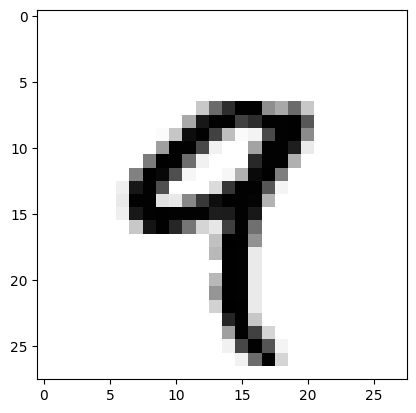

In [30]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary) # cmap = plt.cm.binary로 단정한 느낌 줌
plt.show()

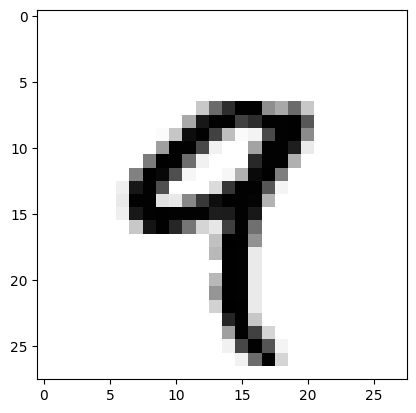

In [31]:
fig, ax = plt.subplots()
ax.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [34]:
train_labels[4]

9

## NumPy로 텐서 조작하기

In [36]:
# 비추천, 가독성 별로

my_slice = train_images[10:100] # 90개의 이미지를 가져옴
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[:, 14:, 14:] # 오른쪽 아래
my_slice.shape

(60000, 14, 14)

In [40]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## 배치 데이터
- 딥러닝 모델을 한번에 전체 데이터셋을 처리하지 않는다
- 대신 데이터를 작은 배치로 나눔

In [41]:
batch = train_images[:128] # 이미지 갯수를 나눔

## 텐서 연산
- 75 페이지

In [43]:
# keras.layers.Dense(512, activation = 'relu')

In [47]:
def naive_relu(x): # 2차원 배열
  assert len(x.shape) == 2
  x = x.copy() # 입력 텐서 자체를 바꾸지 않고 복사함
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)

  return x

def naive_add(x, y):
  assert len(x.shape) == 2 # 2차원 배열
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

- 원소별 연산

In [49]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y # 각각 원소별 덧셈
  z = np.maximum(z, 0.) # 월소별 렐루 함수
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [50]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.43 s


## 브로드캐스팅
- 참고 : https://numpy.org/doc/stable/user/basics.broadcasting.html

In [61]:
import numpy as np
X = np.random.random((32, 10)) # X는 크기가 32, 10인 행렬
y = np.random.random((10, )) # 1차원 벡터

y.shape, y.ndim

((10,), 1)

In [62]:
y = np.expand_dims(y, axis = 0) # 2차원 행렬
y.shape, y.ndim

((1, 10), 2)

In [63]:
Y = np.concatenate([y]* 32, axis = 0)
Y.shape, y.ndim

((32, 10), 2)

In [64]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [65]:
# 79 페이지
import numpy as np
x = np.random.random((64, 3, 32, 10)) # 4차원
y = np.random.random((32, 10)) # 배열 다름 2차원
z = np.maximum(x, y) # 4차원

In [68]:
z.shape, x.shape, x.ndim, y.ndim

((64, 3, 32, 10), (64, 3, 32, 10), 4, 2)

## 텐서 곱셈


In [71]:
# 행렬 곱셈 np.dot 79 페이지
x = np.random.random((32, ))
y = np.random.random((32, ))
z = np.dot(x, y)
z

8.358470294577513

In [72]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [73]:
naive_vector_dot(x, y)

8.358470294577515

- 행렬과 벡터를 행렬곱하는 메서드 만듦

In [76]:
np.zeros(15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # 2차원 행렬
    assert len(y.shape) == 1 # 1차원 벡터
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

- 기존에 만든 함수를 재사용해서 표현

In [77]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

- 행렬곱 연산 함수를 구현함

In [78]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 텐서플로는 행렬곱 연산을 기반으로 한다!

In [80]:
x = np.random.random((64, 32))
y = np.random.random((32, 16))
z = np.random.random((16, 8))

result = naive_matrix_dot(x, y)
naive_matrix_dot(result, z)

array([[61.90227025, 54.93339372, 56.58474926, 57.6231211 , 64.64279953,
        55.57201932, 58.9441025 , 55.48278782],
       [65.28362069, 57.72120748, 59.03516899, 59.27863366, 67.40312941,
        57.71326712, 59.75565305, 57.53577884],
       [52.03021323, 46.17237925, 47.40875399, 48.38326007, 54.13677255,
        46.84078126, 49.22457433, 46.27440423],
       [64.37889545, 56.86334186, 58.56596004, 60.2125276 , 66.35393171,
        58.08118421, 61.4601589 , 56.3043486 ],
       [62.99374249, 55.06108741, 56.41928091, 57.99886877, 64.71559863,
        56.53366773, 58.66937017, 54.95823133],
       [63.28440352, 55.20980368, 57.97375918, 57.64810893, 65.68461036,
        56.93795164, 58.54871655, 55.82414901],
       [64.26133639, 56.87422487, 59.17549308, 59.99837587, 67.04831721,
        58.09590631, 61.88857253, 56.20849349],
       [60.11123549, 53.47067988, 55.21240203, 55.751399  , 63.04733373,
        54.8801024 , 56.4307723 , 53.64864578],
       [52.04080602, 47.71832623

## 텐서 크기 변환

In [81]:
train_images = train_images.reshape((60000, 28 * 28))

In [88]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [89]:
x.reshape((2, 3))

array([[0., 1., 2.],
       [3., 4., 5.]])

In [90]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)